In [ ]:
%pip install sdv

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving real_train.csv to real_train.csv


In [ ]:
from sdv.datasets.local import load_csvs
from sdv.datasets.demo import download_demo

# This is the default folder name that the GOogle Colab notebook uses.
# Change this if you have your own folder with CSV files.
FOLDER_NAME = 'content/'

data = load_csvs(folder_name='/content/')

/usr/local/lib/python3.10/dist-packages/sdv/datasets/local.py:36: UserWarning: Ignoring incompatible files ['metadata.json'] in folder '/content/'.
  warnings.warn(f"Ignoring incompatible files {other_files} in folder '{folder_name}'.")


In [ ]:
data.keys()

dict_keys(['real_train'])

In [ ]:
train_set = data['real_train']

# use the head method to inspect the first few rows of the data
train_set.head(3)

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,59.166.0.9,12425,149.171.126.3,80,6,7.0,1684,10168,14,18,27,1073,0,Benign
1,175.45.176.0,47135,149.171.126.16,8088,6,0.0,160,80,4,2,18,676,0,Benign
2,59.166.0.7,59116,149.171.126.5,21922,6,11.0,4968,3080,28,30,27,842,0,Benign


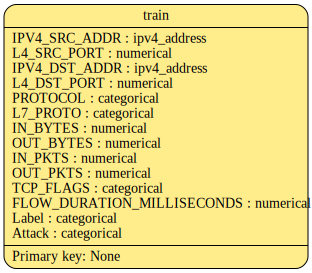

In [ ]:
from sdv.metadata import Metadata

metadata = Metadata.load_from_json('metadata.json')
metadata.visualize()

In [ ]:
from sdv.single_table import TVAESynthesizer

synthesizer = TVAESynthesizer(
    metadata, # required
    epochs=500,
    verbose=True,
    cuda=True
)
synthesizer.fit(train_set)

Loss: -28.092: 100%|██████████| 500/500 [01:45<00:00,  4.74it/s]


In [ ]:
synthesizer.save(
    filepath='tvae_synthesizer.pkl'
)

synthesizer = TVAESynthesizer.load(
    filepath='tvae_synthesizer.pkl'
)

In [ ]:
synthetic_train_set = synthesizer.sample(num_rows=len(train_set))

synthetic_train_set.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,171.41.106.10,5726,12.170.255.199,98,17,0.0,367,277,3,3,0,35,0,Benign
1,146.186.194.108,8374,147.166.114.255,42,17,5.0,222,54,4,8,0,142,0,Benign
2,89.118.222.70,9202,8.28.104.65,107,17,11.0,547,494,3,5,0,743,0,Benign
3,125.139.134.248,2373,76.250.168.44,83,17,0.0,303,996,2,3,0,0,0,Benign
4,206.13.22.96,6458,25.182.235.93,48257,6,36.0,4219,79114,64,70,27,184,0,Benign


In [ ]:
synthetic_train_set.to_csv('tvae_synthetic_train.csv', index=False)